In [1]:
# for string
arr = []
f = open("input.txt", "r")
for l in f.readlines():
    arr.append(l.strip())
    # print(l.strip())


In [2]:
# For integer
# arr = []
# for line in open("input.txt", "r"):
#    arr.append([int(x) for x in line.strip()])

In [3]:
from collections import defaultdict


graph = defaultdict(list)
def addEdge(graph,u,v):
    graph[u].append(v)
  
for i in arr:
    addEdge(graph, i.split('-')[0], i.split('-')[1])
    addEdge(graph, i.split('-')[1], i.split('-')[0]) # V important to make it bidirectional!
    #print(graph)

def findallpaths(curr, visited):
	if curr == 'end':
		return 1
	paths = 0
	for node in graph[curr]:
		if node is not 'end' and node == node.lower():
			if node not in visited:
				# print(visited, nxt,visited | set([nxt]))
				# print(node)
				paths += findallpaths(node, visited | set([node]))
		else:
			paths += findallpaths(node, visited)
	return paths
print('Part 1', findallpaths('start', set(['start'])))

Part 1 5457


In [4]:
def findallpathswithsmalltwice(curr, visited, flagtwice):
	if curr == 'end':
		return 1
	paths = 0
	for node in graph[curr]:
		if node == 'start':
			continue
		if node is not 'end' and node == node.lower():
			if node in visited:
				if not flagtwice:
					# flagtwice = True
					paths += findallpathswithsmalltwice(node, visited, True)
				
			else:
				paths += findallpathswithsmalltwice(node, visited | set([node]), flagtwice)
		else:
			paths += findallpathswithsmalltwice(node, visited, flagtwice)
	return paths
print(findallpathswithsmalltwice('start', set(), False))

128506


# Some graph visualization using NetworkX

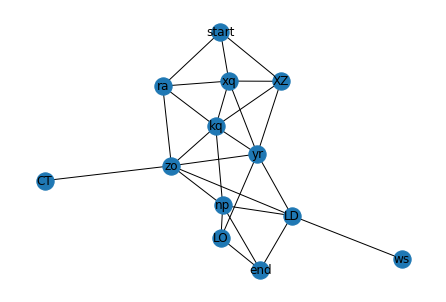

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.from_dict_of_lists(graph)
nx.draw(G,with_labels=True)
plt.show()

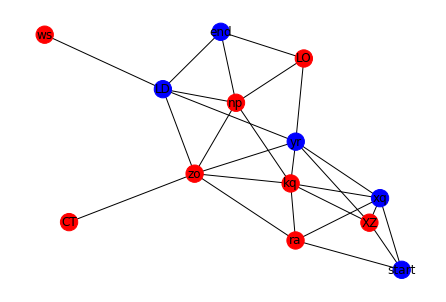

In [6]:
shortestPath = nx.shortest_path(G, source='start', target='end')
node_colors = ["blue" if n in shortestPath else "red" for n in G.nodes()]
nx.draw(G, node_color=node_colors,with_labels=True)
plt.show()